In [3]:
import pandas_datareader as web

In [4]:
import pandas as pd

In [6]:
import datetime

In [7]:
start = datetime.datetime(2018,1,1)

In [11]:
end = datetime.date.today()

In [20]:
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = web.DataReader("AAPL", "morningstar", start, end)

In [21]:
apple.head()


Close    High     Low    Open    Volume
Symbol Date                                                
AAPL   2018-01-01  169.23  169.23  169.23  169.23         0
       2018-01-02  172.26  172.30  169.26  170.16  25555934
       2018-01-03  172.23  174.55  171.96  172.53  29517899
       2018-01-04  173.03  173.47  172.08  172.54  22434597
       2018-01-05  175.00  175.37  173.05  173.44  23660018

In [22]:
print apple

                    Close      High       Low     Open    Volume
Symbol Date                                                     
AAPL   2018-01-01  169.23  169.2300  169.2300  169.230         0
       2018-01-02  172.26  172.3000  169.2600  170.160  25555934
       2018-01-03  172.23  174.5500  171.9600  172.530  29517899
       2018-01-04  173.03  173.4700  172.0800  172.540  22434597
       2018-01-05  175.00  175.3700  173.0500  173.440  23660018
       2018-01-08  174.35  175.6100  173.9300  174.350  20567766
       2018-01-09  174.33  175.0600  173.4100  174.550  21583997
       2018-01-10  174.29  174.3000  173.0000  173.160  23959895
       2018-01-11  175.28  175.4886  174.4900  174.590  18667729
       2018-01-12  177.09  177.3600  175.6500  176.180  25418080
       2018-01-15  177.09  177.0900  177.0900  177.090         0
       2018-01-16  176.19  179.3900  176.1400  177.900  29565947
       2018-01-17  179.10  179.2500  175.0700  176.150  34386836
       2018-01-18  179.26

Populating the interactive namespace from numpy and matplotlib


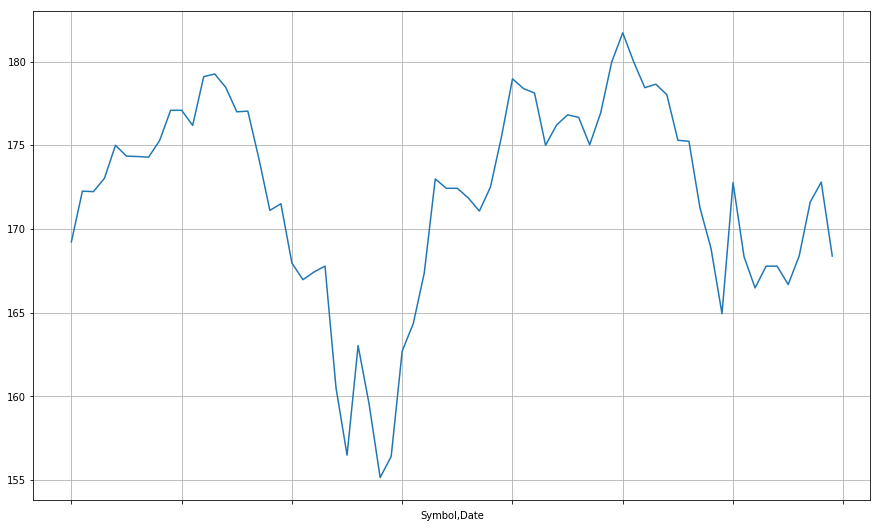

In [24]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
apple["Close"].plot(grid = True) 


In [26]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.mpl_finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
 
pandas_candlestick_ohlc(apple)


ImportError: No module named mpl_finance

In [27]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()
df = web.DataReader("TSLA", 'morningstar', start, end)
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
df = df.drop("Symbol", axis=1)

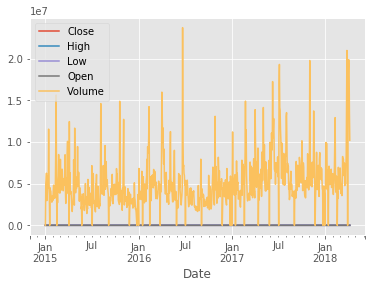

In [28]:
df.plot()

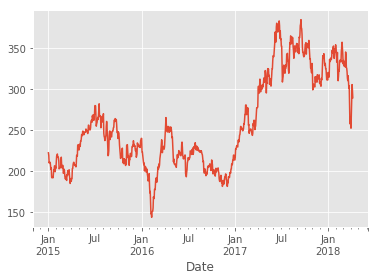

In [29]:
df['Close'].plot()

             Close    High       Low    Open   Volume     100ma
Date                                                           
2015-01-01  222.41  222.41  222.4100  222.41        0  222.4100
2015-01-02  219.31  223.25  213.2600  222.63  4764443  220.8600
2015-01-05  210.09  216.50  207.1626  214.50  5368477  217.2700
2015-01-06  211.28  214.20  204.2100  210.06  6261936  215.7725
2015-01-07  210.95  214.78  209.7800  213.40  2968390  214.8080


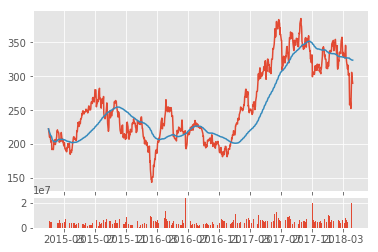

In [30]:
df['100ma'] = df['Close'].rolling(window=100, min_periods=0).mean()
print(df.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()